# Exploratory Data Analysis                                               
# and Data Wrangling  - Project 1
### Sergio Chairez, Maya Mizuki and Jessica Marvin and C.A.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import os
#print(os.getcwd())
#print(os.listdir())

In [2]:
#Reading in our CSV file
data = pd.read_csv('DA_responses.csv')

In [3]:
#deleting the timestamp feature, since it is unnecessary
data = data.drop('Timestamp',axis = 1)

In [4]:
data.head()

,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?"
0,18,Female,1st,Kinesology,"Yes, entirely",Yes,NaN
1,21+,Male,1st,Comp Sci,"Yes, entirely",No,NaN
2,18,Female,1st,Engineering,No,Yes,Parent/guardian/family member
3,19,Female,1st,Accounting,No,No,Parent/guardian/family member
4,18,Male,1st,Business,"Yes, entirely",No,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
How old are you?                                            44 non-null object
What gender do you identify as?                             44 non-null object
What year at De Anza are you?                               44 non-null object
What is your declared major?                                44 non-null object
Do you pay for your own classes?                            43 non-null object
If yes, do you work?                                        44 non-null object
If you do not pay for your classes, who is contributing?    24 non-null object
dtypes: object(7)
memory usage: 2.5+ KB


In [6]:
#From first glance, we see that the '21+' values within the age feature
#are preventing our age feature values to be 
#read as integer values. We'll have to delete the + 
data.loc[data['How old are you?'] == "21+"]

,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?"
1,21+,Male,1st,Comp Sci,"Yes, entirely",No,NaN
9,21+,Male,1st,Nursing,No,Yes,NaN
10,21+,Female,1st,Business,Yes,Yes,NaN
15,21+,Male,3rd,Comp Sci,Yes,No,NaN
17,21+,Female,3rd,Bio,Yes,Yes,NaN
35,21+,Male,3rd,Kinesiology,Yes,Yes,NaN
38,21+,Male,2nd,Kinesiology,Yes,Yes,NaN


In [7]:
#replacing all "21+" string values with 21
data['How old are you?'] = data['How old are you?'].replace('21+','21')

In [8]:
#We'll next want to fix the age feature value and the year value so they're read as numerical 
#variable types, otherwise we won't be able to run some descriptive stats on these features
data.dtypes

How old are you?                                            object
What gender do you identify as?                             object
What year at De Anza are you?                               object
What is your declared major?                                object
Do you pay for your own classes?                            object
If yes, do you work?                                        object
If you do not pay for your classes, who is contributing?    object
dtype: object

In [9]:
#Replacing '1st', '2nd', and  '3rd' values with '1','2', and '3'
data['What year at De Anza are you?'] = data['What year at De Anza are you?'].replace('1st','1')
data['What year at De Anza are you?'] = data['What year at De Anza are you?'].replace('2nd','2')
data['What year at De Anza are you?'] = data['What year at De Anza are you?'].replace('3rd','3')

In [32]:
data.head(40)

,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?",Academic_Divisions,Academic Divisions
0,18,Female,1,Kinesology,"Yes, entirely",Yes,NaN,P.E. & Athletics Division,N/A
1,21,Male,1,Comp Sci,"Yes, entirely",No,NaN,"Physical Sciences, Mathematics and Engineering",N/A
2,18,Female,1,Engineering,No,Yes,Parent/guardian/family member,"Physical Sciences, Mathematics and Engineering","Physical Sciences, Mathematics and Engineering"
3,19,Female,1,Accounting,No,No,Parent/guardian/family member,Social Sciences and Humanities Division,N/A
4,18,Male,1,Business,"Yes, entirely",No,NaN,"Physical Sciences, Mathematics and Engineering",N/A
5,19,Male,1,Business,NaN,No,NaN,"Physical Sciences, Mathematics and Engineering",N/A
6,19,Male,1,B.A.,No,Yes,Parent/guardian/family member,"Physical Sciences, Mathematics and Engineering",N/A
7,18,Male,1,Photography,No,Yes,Parent/guardian/family member,Creative Arts,N/A
8,18,Male,1,Animation,No,No,Parent/guardian/family member,Creative Arts,N/A
9,21,Male,1,Nursing,No,Yes,NaN,"Biological, Health and Environmental Sciences",N/A


In [11]:
# changing the variable types from object to int64
data['How old are you?'] = data['How old are you?'].astype('int64')
data['What year at De Anza are you?'] = data['What year at De Anza are you?'].astype('int64')

In [12]:
#Great! Now let's check and make sure our two features of interest are read 
#as the correct data types
data.dtypes

How old are you?                                             int64
What gender do you identify as?                             object
What year at De Anza are you?                                int64
What is your declared major?                                object
Do you pay for your own classes?                            object
If yes, do you work?                                        object
If you do not pay for your classes, who is contributing?    object
dtype: object

In [13]:
#Let's take a look at some descriptive statistics for our age variable
print(data['How old are you?'].describe())

count    44.000000
mean     18.977273
std       1.171138
min      17.000000
25%      18.000000
50%      19.000000
75%      20.000000
max      21.000000
Name: How old are you?, dtype: float64


In [14]:
#Percentiles in tenths for the age values

tenth_age = data['How old are you?'].quantile(0.1)
print("the 10th percentile = %2s" %tenth_age)
twentieth_age = data['How old are you?'].quantile(0.2)
print("the 20th percentile = %2s" %twentieth_age)
thirtieth_age = data['How old are you?'].quantile(0.3)
print("the 30th percentile = %2s" %thirtieth_age)

fourtieth_age = data['How old are you?'].quantile(0.4)
print("the 40th percentile = %2s" %fourtieth_age)

fiftieth_age = data['How old are you?'].quantile(0.5)
print("the 50th percentile = %2s" %fiftieth_age)

sixtieth_age = data['How old are you?'].quantile(0.6)
print("the 60th percentile = %2s" %sixtieth_age)

seventieth_age = data['How old are you?'].quantile(0.7)
print("the 70th percentile = %2s" %seventieth_age)

eightieth_age = data['How old are you?'].quantile(0.8)
print("the 80th percentile = %2s" %eightieth_age)

ninetieth_age = data['How old are you?'].quantile(0.9)
print("the 90th percentile = %2s" %ninetieth_age)

onehund_age = data['How old are you?'].quantile(1)
print("the 100th percentile = %2s" %onehund_age)

the 10th percentile = 18.0
the 20th percentile = 18.0
the 30th percentile = 18.0
the 40th percentile = 18.0
the 50th percentile = 19.0
the 60th percentile = 19.0
the 70th percentile = 19.099999999999998
the 80th percentile = 20.0
the 90th percentile = 21.0
the 100th percentile = 21.0


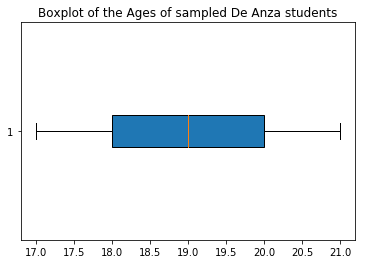

In [15]:
#matplotlib boxplot for age feature
plt.title("Boxplot of the Ages of sampled De Anza students")
plt.boxplot(data['How old are you?'],vert=False, patch_artist=True)
plt.show()


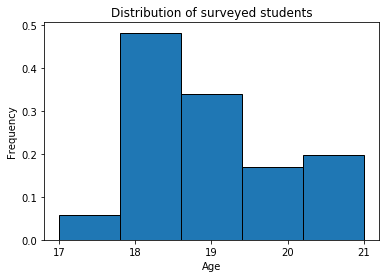

In [16]:
# Define a function for a histogram
def histogram(data_age, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data_age,5,histtype='bar',align = 'mid',edgecolor='black',density=True)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.xticks(np.arange(17, 22, step=1))
    

# Call the function to create plot
histogram(data_age = data['How old are you?']
           , x_label = 'Age'
           , y_label = 'Frequency'
           , title = 'Distribution of surveyed students')




In [17]:
print(data['What year at De Anza are you?'].describe())


count    44.000000
mean      1.454545
std       0.729911
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: What year at De Anza are you?, dtype: float64


In [18]:
data['What is your declared major?'] = data['What is your declared major?'].replace('ICS','Comp Sci')

In [19]:
data.head(44)

,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?"
0,18,Female,1,Kinesology,"Yes, entirely",Yes,NaN
1,21,Male,1,Comp Sci,"Yes, entirely",No,NaN
2,18,Female,1,Engineering,No,Yes,Parent/guardian/family member
3,19,Female,1,Accounting,No,No,Parent/guardian/family member
4,18,Male,1,Business,"Yes, entirely",No,NaN
5,19,Male,1,Business,NaN,No,NaN
6,19,Male,1,B.A.,No,Yes,Parent/guardian/family member
7,18,Male,1,Photography,No,Yes,Parent/guardian/family member
8,18,Male,1,Animation,No,No,Parent/guardian/family member
9,21,Male,1,Nursing,No,Yes,NaN


In [20]:
data.loc[data['Do you pay for your own classes?'] == 'No']

,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?"
2,18,Female,1,Engineering,No,Yes,Parent/guardian/family member
3,19,Female,1,Accounting,No,No,Parent/guardian/family member
6,19,Male,1,B.A.,No,Yes,Parent/guardian/family member
7,18,Male,1,Photography,No,Yes,Parent/guardian/family member
8,18,Male,1,Animation,No,No,Parent/guardian/family member
9,21,Male,1,Nursing,No,Yes,NaN
12,18,Male,1,Film,No,Yes,Parent/guardian/family member
13,19,Male,2,Undecided,No,Yes,Parent/guardian/family member
14,19,Male,1,Accounting,No,No,Parent/guardian/family member
16,18,Male,1,Business,No,No,Parent/guardian/family member


In [21]:
data.head(50)

,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?"
0,18,Female,1,Kinesology,"Yes, entirely",Yes,NaN
1,21,Male,1,Comp Sci,"Yes, entirely",No,NaN
2,18,Female,1,Engineering,No,Yes,Parent/guardian/family member
3,19,Female,1,Accounting,No,No,Parent/guardian/family member
4,18,Male,1,Business,"Yes, entirely",No,NaN
5,19,Male,1,Business,NaN,No,NaN
6,19,Male,1,B.A.,No,Yes,Parent/guardian/family member
7,18,Male,1,Photography,No,Yes,Parent/guardian/family member
8,18,Male,1,Animation,No,No,Parent/guardian/family member
9,21,Male,1,Nursing,No,Yes,NaN


In [22]:
# Something interesting to check out would be the academic divisions, since there's
# a diverse variety of majors represented in our sample
def Academic_Divisions(c):
    if c['What is your declared major?'] == 'Engineering':
        return 'Physical Sciences, Mathematics and Engineering' 
    if c['What is your declared major?'] == 'engineering':
        return 'Physical Sciences, Mathematics and Engineering' 
    if c['What is your declared major?'] == 'Business':
        return 'Physical Sciences, Mathematics and Engineering' 
    if c['What is your declared major?'] == 'business':
        return 'Physical Sciences, Mathematics and Engineering' 
    if c['What is your declared major?'] =='Comp Sci':
        return 'Physical Sciences, Mathematics and Engineering' 
    if c['What is your declared major?'] == 'B.A.':
        return 'Physical Sciences, Mathematics and Engineering' 
    if c['What is your declared major?'] == 'Economics':
        return 'Social Sciences and Humanities Division'
    if c['What is your declared major?'] == 'Accounting':
        return 'Social Sciences and Humanities Division'
    if c['What is your declared major?'] == 'Poli Sci':
        return 'Social Sciences and Humanities Division'
    if c['What is your declared major?'] == 'Psychology':
        return 'Social Sciences and Humanities Division'
    if c['What is your declared major?'] == 'psychology':
        return 'Social Sciences and Humanities Division'
    if c['What is your declared major?'] == 'Administration of Justice':
        return 'Social Sciences and Humanities Division'
    if c['What is your declared major?'] == 'Nursing':
        return 'Biological, Health and Environmental Sciences'
    if c['What is your declared major?'] == 'Nursuing':
        return 'Biological, Health and Environmental Sciences'
    if c['What is your declared major?'] == 'Bio':
        return 'Biological, Health and Environmental Sciences'
    if c['What is your declared major?'] == 'Animal Science':
        return 'Biological, Health and Environmental Sciences'
    if c['What is your declared major?'] == 'Biology':
        return 'Biological, Health and Environmental Sciences'
    if c['What is your declared major?'] == 'Chemistry':
        return 'Biological, Health and Environmental Sciences'
    if c['What is your declared major?'] == 'Microbio':
        return 'Biological, Health and Environmental Sciences'
    if c['What is your declared major?'] == 'Photography':
        return 'Creative Arts'
    if c['What is your declared major?'] == 'Photo':
        return 'Creative Arts'
    if c['What is your declared major?'] == 'Animation':
        return 'Creative Arts'
    if c['What is your declared major?'] == 'Film':
        return 'Creative Arts'
    if c['What is your declared major?'] == 'Film ':
        return 'Creative Arts'
    if c['What is your declared major?'] == 'Kinesiology':
        return 'P.E. & Athletics Division'
    if c['What is your declared major?'] == 'Kinesology':
        return 'P.E. & Athletics Division'
    if c['What is your declared major?'] == 'Massage':
        return 'P.E. & Athletics Division'
    else:
        return 'N/A'

data['Academic_Divisions'] = data.apply(Academic_Divisions, axis=1)

In [23]:
data

,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?",Academic_Divisions
0,18,Female,1,Kinesology,"Yes, entirely",Yes,NaN,P.E. & Athletics Division
1,21,Male,1,Comp Sci,"Yes, entirely",No,NaN,"Physical Sciences, Mathematics and Engineering"
2,18,Female,1,Engineering,No,Yes,Parent/guardian/family member,"Physical Sciences, Mathematics and Engineering"
3,19,Female,1,Accounting,No,No,Parent/guardian/family member,Social Sciences and Humanities Division
4,18,Male,1,Business,"Yes, entirely",No,NaN,"Physical Sciences, Mathematics and Engineering"
5,19,Male,1,Business,NaN,No,NaN,"Physical Sciences, Mathematics and Engineering"
6,19,Male,1,B.A.,No,Yes,Parent/guardian/family member,"Physical Sciences, Mathematics and Engineering"
7,18,Male,1,Photography,No,Yes,Parent/guardian/family member,Creative Arts
8,18,Male,1,Animation,No,No,Parent/guardian/family member,Creative Arts
9,21,Male,1,Nursing,No,Yes,NaN,"Biological, Health and Environmental Sciences"


(0, 16)

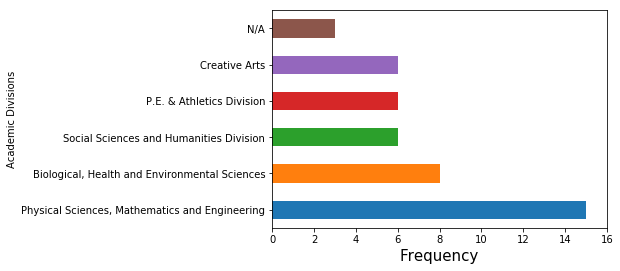

In [24]:
data_3 = data['Academic_Divisions'].value_counts().plot(kind='barh')
plt.xlabel("Frequency",fontsize=15)
plt.ylabel("Academic Divisions",fontsize=10)
plt.xlim([0,16])

(0.0, 30)

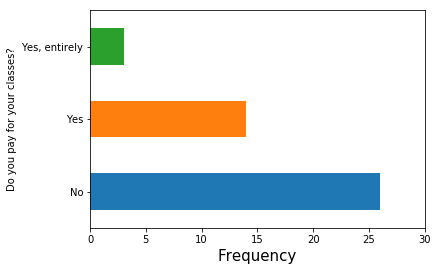

In [25]:
data_2 = data['Do you pay for your own classes?'].value_counts().plot(kind='barh')
plt.xlabel("Frequency",fontsize=15)
plt.ylabel("Do you pay for your classes?",fontsize=10)
plt.xlim([0.0,30])

In [26]:
#OK let's get to the main event. The whole point of this study is to get a glimpse
# of how students are financing their education and if they work to support their 
#academic goals


In [27]:
pay_true =data.loc[(data["Do you pay for your own classes?"] == 'Yes') 
         | (data["Do you pay for your own classes?"] == 'Yes, entirely') ]
pay_true.head(30)


,How old are you?,What gender do you identify as?,What year at De Anza are you?,What is your declared major?,Do you pay for your own classes?,"If yes, do you work?","If you do not pay for your classes, who is contributing?",Academic_Divisions
0,18,Female,1,Kinesology,"Yes, entirely",Yes,NaN,P.E. & Athletics Division
1,21,Male,1,Comp Sci,"Yes, entirely",No,NaN,"Physical Sciences, Mathematics and Engineering"
4,18,Male,1,Business,"Yes, entirely",No,NaN,"Physical Sciences, Mathematics and Engineering"
10,21,Female,1,Business,Yes,Yes,NaN,"Physical Sciences, Mathematics and Engineering"
11,20,Male,1,Massage,Yes,Yes,NaN,P.E. & Athletics Division
15,21,Male,3,Comp Sci,Yes,No,NaN,"Physical Sciences, Mathematics and Engineering"
17,21,Female,3,Bio,Yes,Yes,NaN,"Biological, Health and Environmental Sciences"
18,19,Female,2,Poli Sci,Yes,No,NaN,Social Sciences and Humanities Division
21,18,Male,1,Film,Yes,Yes,NaN,Creative Arts
22,17,Male,1,Chemistry,Yes,Yes,NaN,"Biological, Health and Environmental Sciences"


In [28]:
#17 people either pay for some or pay for all of their education
len(pay_true)

17

(0.0, 13)

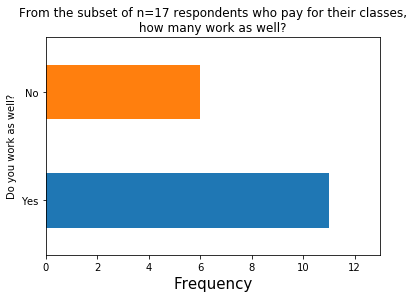

In [29]:
data_4 = pay_true['If yes, do you work?'].value_counts().plot(kind='barh')
plt.title("From the subset of n=17 respondents who pay for their classes,\n how many work as well? ")
plt.xlabel("Frequency",fontsize=15)
plt.ylabel("Do you work as well?",fontsize=10)
plt.xlim([0.0,13])

In [30]:
#Deprecated Code - Don't look
# Something interesting to check out would be the academic divisions, since there's
# a diverse variety of majors represented in our sample

data['Academic Divisions'] = ['Physical Sciences, Mathematics and Engineering' 
                             if x == 'Engineering' or x == 'engineering' else 'N/A'
                             for x in data['What is your declared major?']]

In [ ]:
# 1propZtest
# Combine the Y/N results 
#simple hypothesis testing
# on all the students
